In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/in_process/Popular_Games_expanded.csv', index_col = 'game_id')
dfgood = pd.read_csv('../data/in_process/Popular_Games.csv', index_col = 'game_id')

In [3]:
df.describe()

,min_players,max_players,avg_time,year,avg_rating,geek_rating,num_votes,age,owned,weight
count,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000
mean,1.998951,5.466862,82.654308,1996.456586,6.950445,6.245841,3084.935612,10.657508,5277.257550,2.273101
std,0.699575,7.197982,246.712028,175.123777,0.771389,0.539750,6084.947744,2.741033,8597.807335,0.776210
min,0.000000,0.000000,1.000000,-3500.000000,2.266230,3.526090,500.000000,0.000000,263.000000,1.000000
25%,2.000000,4.000000,30.000000,2004.000000,6.485913,5.874825,750.000000,8.000000,1616.750000,1.673400
50%,2.000000,5.000000,60.000000,2011.000000,6.964510,6.161935,1238.500000,10.000000,2778.500000,2.217450
75%,2.000000,6.000000,90.000000,2015.000000,7.485098,6.550277,2663.000000,13.000000,5382.000000,2.786300
max,8.000000,100.000000,12000.000000,2020.000000,9.186900,8.576860,93524.000000,18.000000,139881.000000,4.723300


##Observations
Number of votes highly correlated with number of users who own the game. Makes sense.
Number of votes also associated with "geek rating." Makes sense because Geek Rating is a Bayesian average.
Number owned is correlated with both ratings. Makes sense that people would vote for stuff they own.
Average playing time and "weight" are correlated. Makes sense. Longer games are weightier.
Recommended age and wieght are correlated because games for kids are less weighty.


<AxesSubplot:>

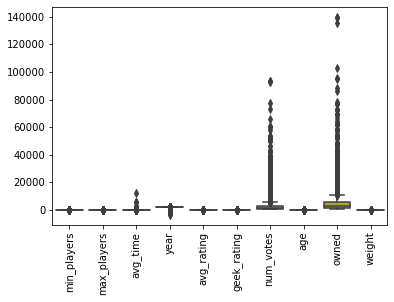

In [4]:
plt.xticks(rotation=90)
sns.boxplot(data=df)

<AxesSubplot:>

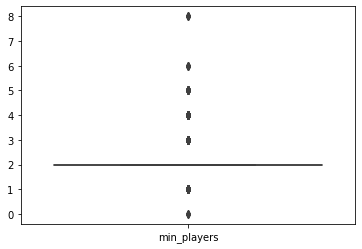

In [5]:
sns.boxplot(data=df[['min_players']])

<AxesSubplot:>

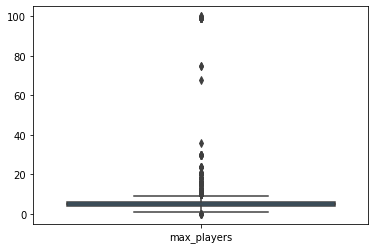

In [6]:
sns.boxplot(data=df[['max_players']])

<AxesSubplot:>

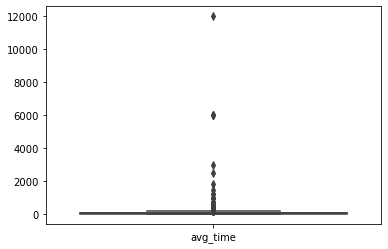

In [7]:
sns.boxplot(data=df[['avg_time']])

<AxesSubplot:>

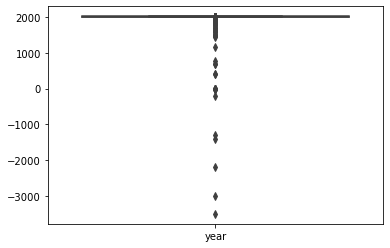

In [8]:
sns.boxplot(data=df[['year']])

<AxesSubplot:>

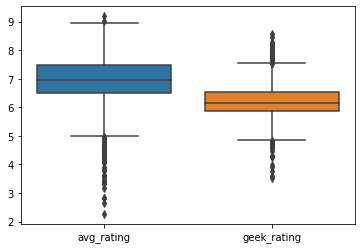

In [9]:
sns.boxplot(data=df[['avg_rating', 'geek_rating']])

<AxesSubplot:>

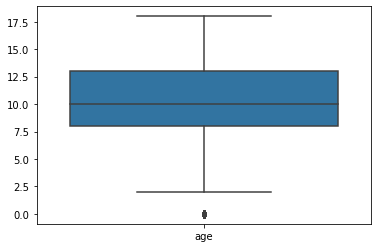

In [10]:
sns.boxplot(data=df[['age']])

<AxesSubplot:>

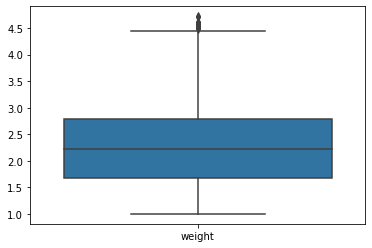

In [11]:
sns.boxplot(data=df[['weight']])

In [12]:
df['max_players'].sort_values()

game_id
23953       0
4149        0
18291       0
25738       0
21804       0
         ... 
621        99
141430     99
155689     99
263918    100
233867    100
Name: max_players, Length: 4768, dtype: int64

In [13]:
df[df['max_players'] == 0]

,names,min_players,max_players,avg_time,year,avg_rating,geek_rating,num_votes,age,mechanic,...,expands,Category_1,Category_2,Category_3,Category_4,Mechanic_1,Mechanic_2,Mechanic_3,Mechanic_4,Mechanic_5
game_id,,,,,,,,,,,,,,,,,,,,,
4149,Barrel of Monkeys,1,0,10.000000,1965,3.59595,4.83187,729.0,3,unknown,...,Nothing,Action / Dexterity,Animals,Children's Game,NaN,unknown,NaN,NaN,NaN,NaN
18291,Unpublished Prototype,0,0,86.965034,0,6.94741,5.93408,734.0,0,unknown,...,Nothing,unknown,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN
21804,Traditional Card Games,0,0,86.965034,0,6.61362,5.90099,835.0,0,unknown,...,Nothing,Card Game,Game System,NaN,NaN,unknown,NaN,NaN,NaN,NaN
23953,Outside the Scope of BGG,0,0,86.965034,0,6.71669,5.83571,550.0,0,unknown,...,Nothing,unknown,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN
25738,The Big Taboo,4,0,60.000000,2006,6.29962,5.72844,624.0,12,"Acting, Memory, Paper-and-Pencil, Team-Based Game",...,Nothing,Action / Dexterity,Memory,Party Game,Word Game,Acting,Memory,Paper-and-Pencil,Team-Based Game,NaN
177497,Firefly: The Game – Jetwash,0,0,86.965034,2015,7.77097,6.12617,580.0,13,unknown,...,Firefly: The Game,Expansion for Base-game,Movies / TV / Radio theme,Science Fiction,Space Exploration,unknown,NaN,NaN,NaN,NaN


In [14]:
#Dropping irrelevant games
df = df.drop([18291, 21804, 23953], axis = 0)

In [15]:
#looking up these two on the web site to get correct player counts
df.loc[4149, 'max_players'] = 1
df.loc[25738, 'max_players'] = 4
df.loc[177497, 'max_players'] = 4
df.loc[177497, 'min_players'] = 1

In [16]:
df['max_players'].sort_values()

game_id
1827        1
35350       1
1608        1
231999      1
22877       1
         ... 
51         99
110279     99
139771     99
233867    100
263918    100
Name: max_players, Length: 4765, dtype: int64

In [17]:
df['max_players'].describe()

count    4765.000000
mean        5.472193
std         7.197985
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max       100.000000
Name: max_players, dtype: float64

In [18]:
df.describe()

,min_players,max_players,avg_time,year,avg_rating,geek_rating,num_votes,age,owned,weight
count,4765.000000,4765.000000,4765.000000,4765.000000,4765.000000,4765.000000,4765.000000,4765.000000,4765.000000,4765.000000
mean,2.000420,5.472193,82.651594,1997.713536,6.950565,6.246065,3086.433158,10.664218,5279.509759,2.273254
std,0.697543,7.197985,246.789672,167.857366,0.771609,0.539845,6086.569783,2.728813,8600.030255,0.776386
min,1.000000,1.000000,1.000000,-3500.000000,2.266230,3.526090,500.000000,0.000000,263.000000,1.000000
25%,2.000000,4.000000,30.000000,2004.000000,6.485260,5.874880,750.000000,8.000000,1617.000000,1.673500
50%,2.000000,5.000000,60.000000,2011.000000,6.965010,6.162790,1239.000000,10.000000,2779.000000,2.217500
75%,2.000000,6.000000,90.000000,2015.000000,7.485150,6.551050,2663.000000,13.000000,5385.000000,2.787200
max,8.000000,100.000000,12000.000000,2020.000000,9.186900,8.576860,93524.000000,18.000000,139881.000000,4.723300


In [19]:
df['age'].unique()

array([14, 12, 10,  8, 13,  9,  7,  6, 11, 16,  4, 18,  0,  5, 15, 17,  3,
        2], dtype=int64)

In [20]:
#Looking at web site, age = 0 just means not provided by publisher
df[df['age'] == 0]

,names,min_players,max_players,avg_time,year,avg_rating,geek_rating,num_votes,age,mechanic,...,expands,Category_1,Category_2,Category_3,Category_4,Mechanic_1,Mechanic_2,Mechanic_3,Mechanic_4,Mechanic_5
game_id,,,,,,,,,,,,,,,,,,,,,
669,Plague & Pestilence,2,6,45.000000,1993,6.19744,5.67922,671.0,0,"Card Drafting, Dice Rolling, Take That",...,Nothing,Card Game,Medieval,NaN,NaN,Card Drafting,Dice Rolling,Take That,NaN,NaN
4286,A Game of Thrones Collectible Card Game,2,5,30.000000,2002,6.85568,5.87459,609.0,0,Hand Management,...,Nothing,Card Game,Collectible Components,Fantasy,Novel-based,Hand Management,NaN,NaN,NaN,NaN
5316,"Warhammer Epic 40,000",2,4,180.000000,1997,6.60233,5.80506,575.0,0,"Dice Rolling, Modular Board, Variable Player P...",...,Nothing,Miniatures,Science Fiction,NaN,NaN,Dice Rolling,Modular Board,Variable Player Powers,NaN,NaN
10934,Things...,4,15,45.000000,2002,6.09903,5.79013,1887.0,0,"Memory, Paper-and-Pencil",...,Nothing,Deduction,Humor,Memory,Party Game,Memory,Paper-and-Pencil,NaN,NaN,NaN
18748,Unhappy King Charles!,2,2,240.000000,2008,7.64185,6.16650,674.0,0,"Campaign / Battle Card Driven, Dice Rolling, P...",...,Nothing,Civil War,Pike and Shot,Wargame,NaN,Campaign / Battle Card Driven,Dice Rolling,Point to Point Movement,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208364,Concordia: Gallia / Corsica,2,5,86.965034,2016,8.19335,6.35010,642.0,0,"Card Drafting, Deck, Bag, and Pool Building, H...",...,Concordia,Ancient,Economic,Expansion for Base-game,Nautical,Card Drafting,Deck,Bag,and Pool Building,Hand Management
213437,Tyrants of the Underdark: Expansion Decks – Ab...,2,4,60.000000,2017,7.87128,6.14741,554.0,0,"Area Majority / Influence, Deck, Bag, and Pool...",...,Tyrants of the Underdark,Fantasy,NaN,NaN,NaN,Area Majority / Influence,Deck,Bag,and Pool Building,NaN
232945,The Voyages of Marco Polo: Agents of Venice,2,5,86.965034,2017,7.96044,6.45510,910.0,0,"Card Drafting, Dice Rolling, Point to Point Mo...",...,The Voyages of Marco Polo,Dice,Economic,Expansion for Base-game,Medieval,Card Drafting,Dice Rolling,Point to Point Movement,Variable Player Powers,NaN


In [21]:
#a non trivial amount. Could just drop, though
(df['age'] == 0).sum()

61

In [22]:
#OK. Less than 1.5%. Maybe we could just drop them.
61/4765*100

1.280167890870934

In [23]:
#can we correlate 0 age to weight?
dfage=df[df['age'] == 0]
dfage = dfage[['age', 'weight']]

In [24]:
#Not really. Weight scale is from 1 to 5.
dfage.describe()

,age,weight
count,61.0,61.000000
mean,0.0,2.522103
std,0.0,0.725791
min,0.0,1.113000
25%,0.0,2.036400
50%,0.0,2.473700
75%,0.0,3.000000
max,0.0,4.034800


In [25]:
#just drop them if we want minimum age to be a relevant factor
df = df.drop(dfage.index, axis = 0)

In [26]:
df['age'].describe()

count    4704.000000
mean       10.802509
std         2.459432
min         2.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        18.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='year', ylabel='Count'>

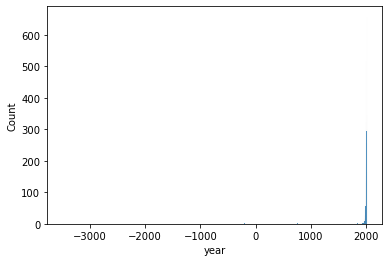

In [27]:
sns.histplot(data = df['year'])

In [28]:
df['year'].describe()

count    4704.000000
mean     1997.550808
std       168.934733
min     -3500.000000
25%      2004.000000
50%      2011.000000
75%      2015.000000
max      2020.000000
Name: year, dtype: float64

In [29]:
df['year'].sort_values().unique()

array([-3500, -3000, -2200, -1400, -1300,  -200,     0,   400,   700,
         762,  1150,  1430,  1475,  1500,  1530,  1587,  1600,  1630,
        1687,  1700,  1701,  1750,  1796,  1800,  1810,  1848,  1850,
        1864,  1874,  1876,  1883,  1887,  1888,  1893,  1895,  1903,
        1906,  1908,  1909,  1927,  1929,  1930,  1931,  1933,  1937,
        1938,  1939,  1940,  1942,  1943,  1946,  1947,  1948,  1949,
        1951,  1954,  1955,  1956,  1958,  1959,  1960,  1962,  1963,
        1964,  1965,  1966,  1967,  1968,  1969,  1970,  1971,  1972,
        1973,  1974,  1975,  1976,  1977,  1978,  1979,  1980,  1981,
        1982,  1983,  1984,  1985,  1986,  1987,  1988,  1989,  1990,
        1991,  1992,  1993,  1994,  1995,  1996,  1997,  1998,  1999,
        2000,  2001,  2002,  2003,  2004,  2005,  2006,  2007,  2008,
        2009,  2010,  2011,  2012,  2013,  2014,  2015,  2016,  2017,
        2018,  2019,  2020], dtype=int64)

<AxesSubplot:ylabel='Count'>

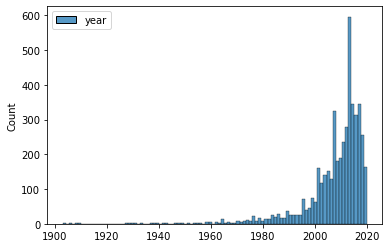

In [30]:
dfy = pd.DataFrame(df['year'])
dfy2 = dfy[dfy['year'] > 1900]
sns.histplot(dfy2)

In [31]:
dfy[dfy['year']>1900].count()

year    4659
dtype: int64

In [32]:
dfy[dfy['year']<1960].count()

year    74
dtype: int64

In [33]:
#limit examination to only more modern games
#will define that as games released since 1960
dfy2 = dfy[dfy['year'] < 1960]
df = df.drop(dfy2.index, axis = 0)
df.describe()

,min_players,max_players,avg_time,year,avg_rating,geek_rating,num_votes,age,owned,weight
count,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000
mean,1.999136,5.457451,83.016465,2008.392009,6.966894,6.258314,3087.955508,10.858963,5288.644276,2.278022
std,0.699658,7.024371,250.067805,10.061053,0.739821,0.529486,6112.668181,2.420251,8625.648781,0.774208
min,1.000000,1.000000,1.000000,1960.000000,3.331770,4.272580,500.000000,2.000000,263.000000,1.000000
25%,2.000000,4.000000,30.000000,2005.000000,6.496457,5.880187,751.000000,9.000000,1634.000000,1.680100
50%,2.000000,5.000000,60.000000,2011.000000,6.971080,6.169290,1249.000000,11.000000,2794.000000,2.222200
75%,2.000000,6.000000,90.000000,2015.000000,7.487145,6.560507,2679.750000,13.000000,5402.750000,2.787725
max,8.000000,100.000000,12000.000000,2020.000000,9.186900,8.576860,93524.000000,18.000000,139881.000000,4.723300


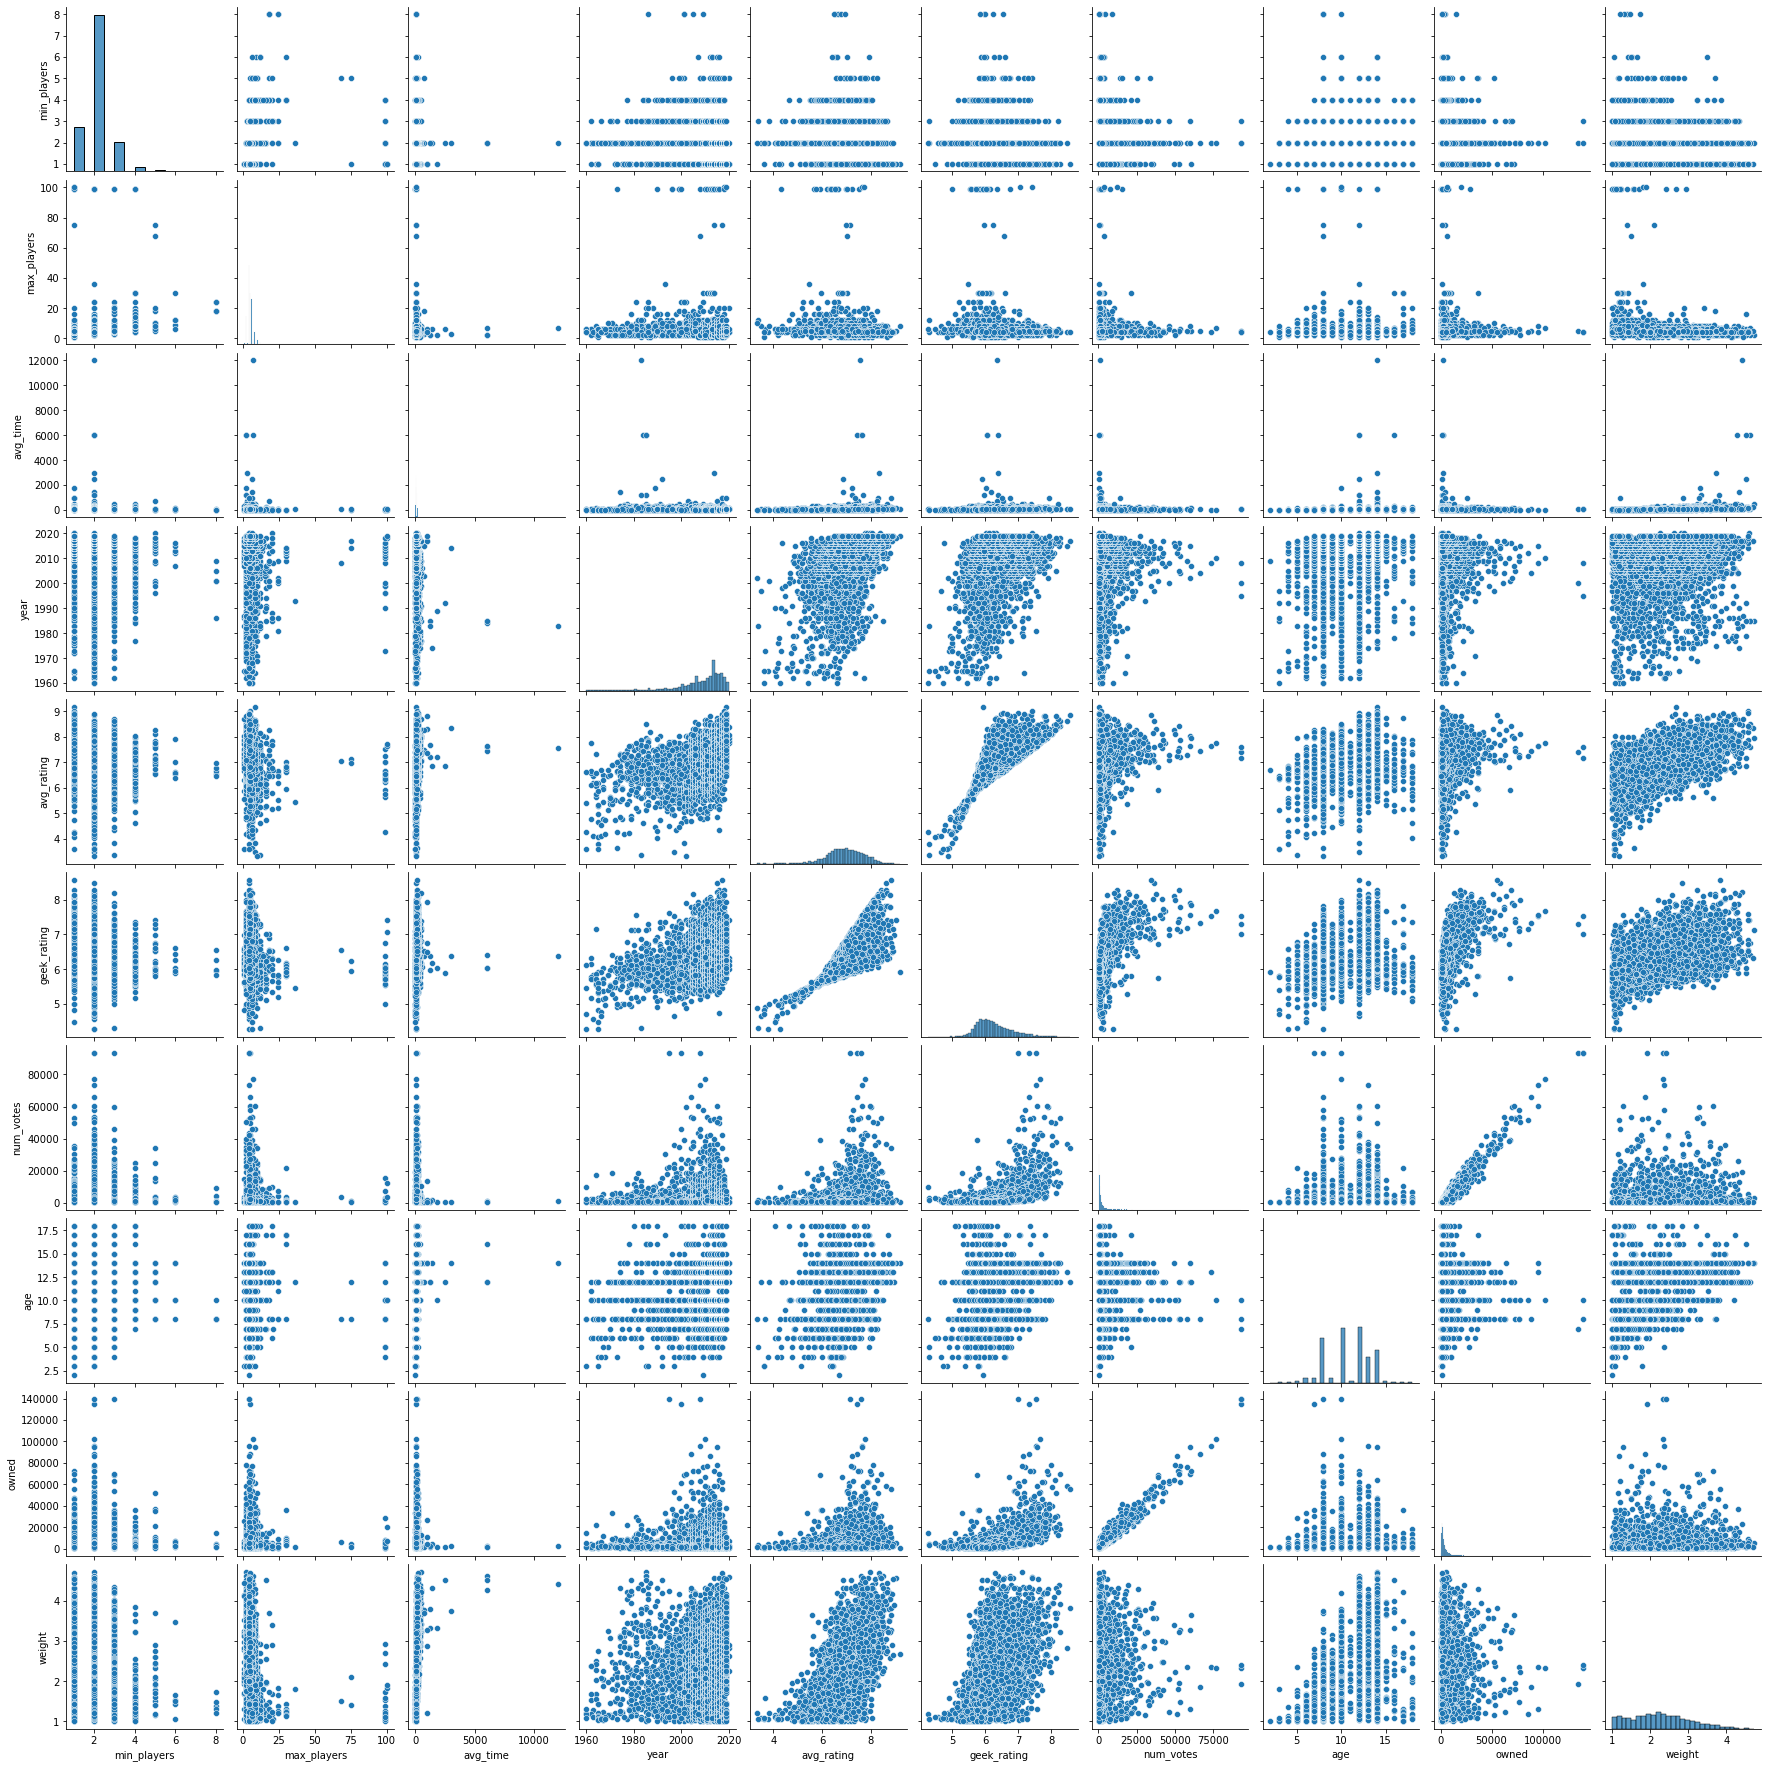

In [34]:
sns.pairplot(df)

<AxesSubplot:>

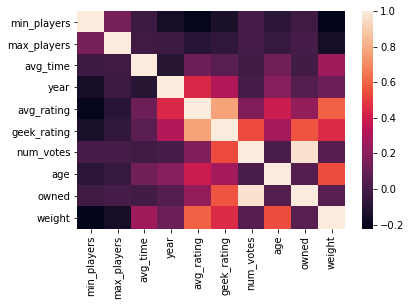

In [35]:
sns.heatmap(df.corr())

### Observations

##### Number of votes highly correlated with number of users who own the game. Makes sense.
##### Number of votes also associated with "geek rating." Makes sense because Geek Rating is a Bayesian average.
##### Number owned is correlated with both ratings. Makes sense that people would vote for stuff they own.
##### Average playing time and "weight" are correlated. Makes sense. Longer games are weightier.
##### Recommended age and wieght are correlated because games for kids are less weighty.
#####  Average rating and min age may be correlated. Do people like games that can be played with their kids?

In [36]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing

In [37]:
#df = pd.get_dummies(df)
#doing this leads to 8807 columns and OLS dies. Need to be more clever about categories.


In [38]:
#dropping expansions and just looking at original games
df = df[df['expands'] == 'Nothing']

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3836 entries, 1 to 287954
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   names        3836 non-null   object 
 1   min_players  3836 non-null   int64  
 2   max_players  3836 non-null   int64  
 3   avg_time     3836 non-null   float64
 4   year         3836 non-null   int64  
 5   avg_rating   3836 non-null   float64
 6   geek_rating  3836 non-null   float64
 7   num_votes    3836 non-null   float64
 8   age          3836 non-null   int64  
 9   mechanic     3836 non-null   object 
 10  owned        3836 non-null   int64  
 11  category     3836 non-null   object 
 12  designer     3836 non-null   object 
 13  publisher    3836 non-null   object 
 14  weight       3836 non-null   float64
 15  expands      3836 non-null   object 
 16  Category_1   3836 non-null   object 
 17  Category_2   3214 non-null   object 
 18  Category_3   2111 non-null   object 
 19  Cate

In [40]:
#create clean DF for regression with no categoricals
df2 = df.drop(['names', 'designer', 'publisher', 'expands'], axis = 1)

In [41]:
dfexpandedC = df.iloc[:, 16:20]

In [42]:
dfexpandedM = df.iloc[:, 20:]

In [43]:
Cats1 = df2['category'].str.split(pat=', ', expand=False).tolist()
Cats = list()
for i in range(len(Cats1)):
    for j in range(len(Cats1[i])):
        Cats.append(Cats1[i][j])

In [44]:
for catg in range(len(Cats)):
    df2[Cats[catg]] = df2['category'].str.contains(Cats[catg]).astype(int)

In [45]:
Mech1 = df2['mechanic'].str.split(pat=', ', expand=False).tolist()
Mech = list()
for i in range(len(Mech1)):
    for j in range(len(Mech1[i])):
        Mech.append(Mech1[i][j])

In [46]:
for mechs in range(len(Mech)):
    df2[Mech[mechs]] = df2['mechanic'].str.contains(Mech[mechs]).astype(int)

In [47]:
#with the above columns for each element of Category and Mechanic
#we don't need the split out columns
df2 = df2.drop(['Category_1', 'Category_2', 'Category_3', 'Category_4'], axis = 1)
df2 = df2.drop(['Mechanic_1', 'Mechanic_2', 'Mechanic_3', 'Mechanic_4', 'Mechanic_5'], axis = 1)

In [48]:
df2 = df2.drop(['mechanic', 'category', 'Expansion for Base-game'], axis = 1)

In [49]:
df2.describe()

,min_players,max_players,avg_time,year,avg_rating,geek_rating,num_votes,age,owned,weight,...,Automatic Resource Growth,Prisoner's Dilemma,Narrative Choice / Paragraph,Contracts,Moving Multiple Units,King of the Hill,Force Commitment,Legacy Game,Bingo,Pattern Movement
count,3836.000000,3836.000000,3836.000000,3836.000000,3836.000000,3836.000000,3836.000000,3836.000000,3836.000000,3836.000000,...,3836.000000,3836.000000,3836.000000,3836.000000,3836.000000,3836.000000,3836.000000,3836.00000,3836.000000,3836.000000
mean,2.010688,5.436131,82.510167,2007.887904,6.834371,6.222357,3387.934307,10.722888,5219.259124,2.217682,...,0.002086,0.001303,0.003128,0.006257,0.001303,0.001043,0.001825,0.00365,0.000521,0.000261
std,0.681773,7.278325,273.188526,10.636066,0.698512,0.539138,6615.109703,2.427055,9229.124746,0.782007,...,0.045626,0.036084,0.055851,0.078861,0.036084,0.032279,0.042684,0.06031,0.022831,0.016146
min,1.000000,1.000000,1.000000,1960.000000,3.331770,4.272580,500.000000,2.000000,263.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2.000000,4.000000,30.000000,2004.000000,6.421880,5.844862,770.000000,8.000000,1503.000000,1.590000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2.000000,5.000000,60.000000,2011.000000,6.848635,6.109750,1345.500000,10.000000,2427.000000,2.150900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,2.000000,6.000000,90.000000,2015.000000,7.300432,6.523722,2936.250000,12.000000,4895.500000,2.730650,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,8.000000,100.000000,12000.000000,2020.000000,9.186900,8.576860,93524.000000,18.000000,139881.000000,4.723300,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [50]:
#Using OLS without train/test splitting just to get an overall
#view of what a regression would look like.
X = df2.drop(['avg_rating', 'geek_rating'], axis = 1)
y1 = df2['avg_rating']
y2 = df2['geek_rating']
X = sm.add_constant(X)

In [51]:
#Basic linear model on the average user rating
rModel1 = sm.OLS(y1, X)
rModel1_result = rModel1.fit()
rModel1_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_rating   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     21.08
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:10:50   Log-Likelihood:                -2235.8
No. Observations:                3836   AIC:                             5014.
Df Residuals:                    3565   BIC:                             6708.
Df Model:                         270                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  -43.3463      1.742    -24.877      0.000     -46.763     -39.930
min_players                             -0.0110      0.015     -0.742      0.458      -0.040       0.018
max_players                             -0.0005      0.001     -0.450      0.653      -0.003       0.002
avg_time                              3.966e-05   3.21e-05      1.236      0.217   -2.33e-05       0.000
year                                     0.0244      0.001     28.096      0.000       0.023       0.026
num_votes                             2.489e-05   7.63e-06      3.260      0.001    9.92e-06    3.99e-05
age                                      0.0047      0.004      1.093      0.275      -0.004       0.013
owned                                -5.234e-06   5.39e-06     -0.971      0.331   -1.58e-05    5.33e-06
weight                                   0.4147      0.018     23.094      0.000       0.379       0.450
Economic                                -0.0244      0.029     -0.840      0.401      -0.081       0.033
Negotiation                              0.2476      0.215      1.151      0.250      -0.174       0.669
Political                               -0.0737      0.047     -1.579      0.115      -0.165       0.018
Card Game                               -0.0088      0.022     -0.397      0.692      -0.052       0.035
Fantasy                                  0.0172      0.024      0.709      0.478      -0.030       0.065
Abstract Strategy                        0.0850      0.039      2.177      0.030       0.008       0.162
Medieval                                 0.0466      0.029      1.589      0.112      -0.011       0.104
Exploration                             -0.0840      0.036     -2.349      0.019      -0.154      -0.014
Travel                                   0.1395      0.070      1.991      0.047       0.002       0.277
Farming                                 -0.0126      0.056     -0.226      0.822      -0.122       0.097
Ancient                                  0.0019      0.038      0.049      0.961      -0.073       0.077
Mythology                                0.0339      0.049      0.698      0.485      -0.061       0.129
Bluffing                                 0.0268      0.033      0.802      0.423      -0.039       0.092
Science Fiction                          0.0197      0.032      0.605      0.545      -0.044       0.083
Collectible Components                  -0.0233      0.061     -0.383      0.702      -0.142       0.096
Dice                                    -0.0275      0.035     -0.782      0.434      -0.096       0.041
Fighting                                 0.0460      0.028      1.615      0.107      -0.010       0.102
Print & Play                          

In [52]:
#Basic linear model on the geek rating
rModel2 = sm.OLS(y2, X)
rModel2_result = rModel2.fit()
rModel2_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            geek_rating   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     23.92
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:10:50   Log-Likelihood:                -1089.9
No. Observations:                3836   AIC:                             2722.
Df Residuals:                    3565   BIC:                             4416.
Df Model:                         270                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  -16.3401      1.292    -12.642      0.000     -18.874     -13.806
min_players                             -0.0029      0.011     -0.268      0.789      -0.024       0.019
max_players                             -0.0003      0.001     -0.312      0.755      -0.002       0.001
avg_time                             -5.825e-07   2.38e-05     -0.024      0.980   -4.72e-05    4.61e-05
year                                     0.0109      0.001     16.846      0.000       0.010       0.012
num_votes                             5.163e-05   5.66e-06      9.117      0.000    4.05e-05    6.27e-05
age                                      0.0014      0.003      0.437      0.662      -0.005       0.008
owned                                -9.349e-06      4e-06     -2.339      0.019   -1.72e-05   -1.51e-06
weight                                   0.2206      0.013     16.563      0.000       0.194       0.247
Economic                                -0.0062      0.022     -0.289      0.773      -0.049       0.036
Negotiation                              0.1998      0.160      1.253      0.210      -0.113       0.513
Political                               -0.0170      0.035     -0.490      0.624      -0.085       0.051
Card Game                               -0.0250      0.016     -1.523      0.128      -0.057       0.007
Fantasy                                 -0.0112      0.018     -0.620      0.535      -0.046       0.024
Abstract Strategy                        0.0428      0.029      1.479      0.139      -0.014       0.100
Medieval                                -0.0014      0.022     -0.066      0.947      -0.044       0.041
Exploration                             -0.0463      0.027     -1.746      0.081      -0.098       0.006
Travel                                   0.0757      0.052      1.456      0.146      -0.026       0.178
Farming                                  0.0172      0.041      0.417      0.677      -0.064       0.098
Ancient                                 -0.0040      0.028     -0.140      0.889      -0.060       0.052
Mythology                                0.0543      0.036      1.507      0.132      -0.016       0.125
Bluffing                                 0.0166      0.025      0.668      0.504      -0.032       0.065
Science Fiction                          0.0334      0.024      1.385      0.166      -0.014       0.081
Collectible Components                  -0.0060      0.045     -0.133      0.894      -0.094       0.082
Dice                                    -0.0455      0.026     -1.748      0.080      -0.097       0.006
Fighting                                 0.0571      0.021      2.699      0.007       0.016       0.098
Print & Play                          

In [53]:
df.to_csv('../data/in_process/Games_cleaned.csv')
df2.to_csv('../data/in_process/Games_coded.csv')